In [2]:
from staticmap import StaticMap
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Proj

In [23]:
def convert_utm(zone, lat, long):
    converter = Proj(proj='utm', zone=zone, ellips='WGS84')
    x, y = converter(np.array([long]), np.array([lat]))
    return np.array([x, y]).T

In [4]:
def culc_distance_OSM(zoom, lat):
    if zoom == 0: return 156412 * np.cos(np.deg2rad(lat))
    if zoom == 1: return 78206 * np.cos(np.deg2rad(lat))
    if zoom == 2: return 39103 * np.cos(np.deg2rad(lat))
    if zoom == 3: return 19551 * np.cos(np.deg2rad(lat))
    if zoom == 4: return 9776 * np.cos(np.deg2rad(lat))
    if zoom == 5: return 4888 * np.cos(np.deg2rad(lat))
    if zoom == 6: return 2444 * np.cos(np.deg2rad(lat))
    if zoom == 7: return 1222 * np.cos(np.deg2rad(lat))
    if zoom == 8: return 610.984 * np.cos(np.deg2rad(lat))
    if zoom == 9: return 305.492 * np.cos(np.deg2rad(lat))
    if zoom == 10: return 152.746 * np.cos(np.deg2rad(lat))
    if zoom == 11: return 76.373 * np.cos(np.deg2rad(lat))
    if zoom == 12: return 38.187 * np.cos(np.deg2rad(lat))
    if zoom == 13: return 19.093 * np.cos(np.deg2rad(lat))
    if zoom == 14: return 9.547 * np.cos(np.deg2rad(lat))
    if zoom == 15: return 4.773 * np.cos(np.deg2rad(lat))
    if zoom == 16: return 2.387 * np.cos(np.deg2rad(lat))
    if zoom == 17: return 1.193 * np.cos(np.deg2rad(lat))
    if zoom == 18: return 0.596 * np.cos(np.deg2rad(lat))
    if zoom == 19: return 0.298 * np.cos(np.deg2rad(lat))
    if zoom == 20: return 0.149 * np.cos(np.deg2rad(lat))


In [12]:
def pix_to_m(pX, pY, tileZ, tileX, tileY):
    L = 85.05112878
    x = 256 * tileX + pX
    y = 256 * tileY + pY
    long = 180 * (x / (1 << (tileZ + 7)) - 1)
    lat = (180 / np.pi) * np.arcsin(np.tanh(- np.pi / (1 << (tileZ + 7)) * y + np.arctanh(np.sin(L * np.pi / 180))))
    return lat, long

In [24]:
convert_utm(zone, lat, long)

array([[ 364446.30919932, 3953472.25478978]])

In [22]:
np.array(np.array([1,2]))

array([1, 2])

In [9]:
lat, long = 35.71588998602826, 139.50139250721242
range_x, range_y = [10000, 10000]
zoom = 15
pixel = [int(range_x / culc_distance_OSM(zoom, lat)), int(range_y / culc_distance_OSM(zoom, lat))]
zone = 54
map = StaticMap(pixel[0], pixel[1])
image = map.render(zoom=zoom, center=[long, lat])
w, h = culc_distance_OSM(zoom, lat) * (pixel[0] / 2), culc_distance_OSM(zoom, lat) * (pixel[1] / 2) #範囲の距離変換
x, y = convert_utm(zone, lat, long) #中心座標の変換

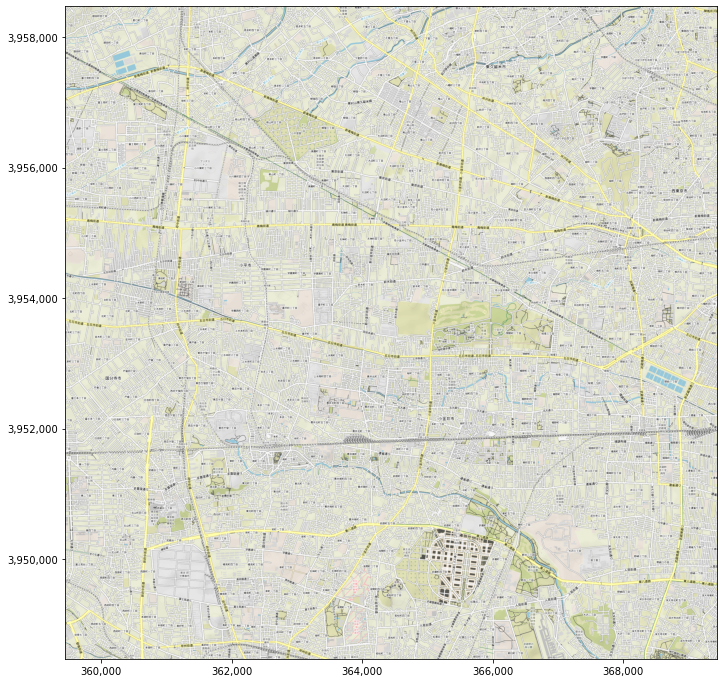

In [10]:

fig, ax = plt.subplots(figsize=(16,12))
im_list = np.asarray(image)
ax.imshow(im_list, extent=(x-w, x+w, y-h, y+h))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))#指数表記させない
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))#指数表記させない

plt.show()

In [25]:
map = StaticMap(800, 600, url_template='https://cyberjapandata.gsi.go.jp/xyz/std/{z}/{x}/{y}.png')

# 地図を描画した Pillow の PIL.Image オブジェクトを取得
# ズームレベルと経度・緯度のリストを指定
image = map.render(zoom=14, center=[136.882090, 35.170560])

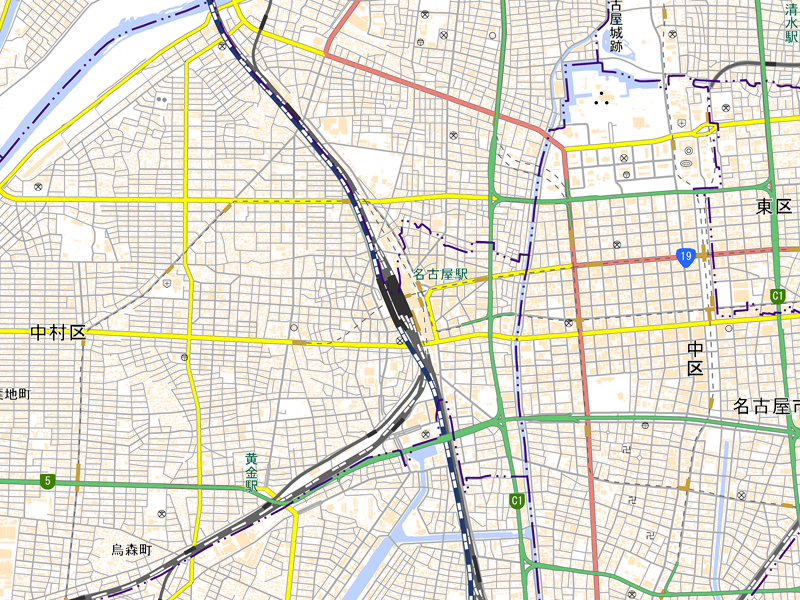

In [26]:
image